In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from scipy.stats import norm
%matplotlib inline

# Train

In [31]:
train = pd.read_csv("/Users/Dario/Desktop/Kaggle/train.csv")

In [32]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


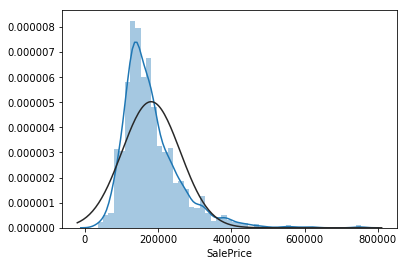

In [38]:
sns.distplot(train["SalePrice"], fit=norm)

In [39]:
train["SalePrice"] = np.log(train["SalePrice"])

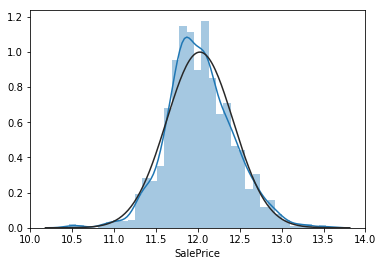

In [47]:
sns.distplot(train["SalePrice"], fit=norm)

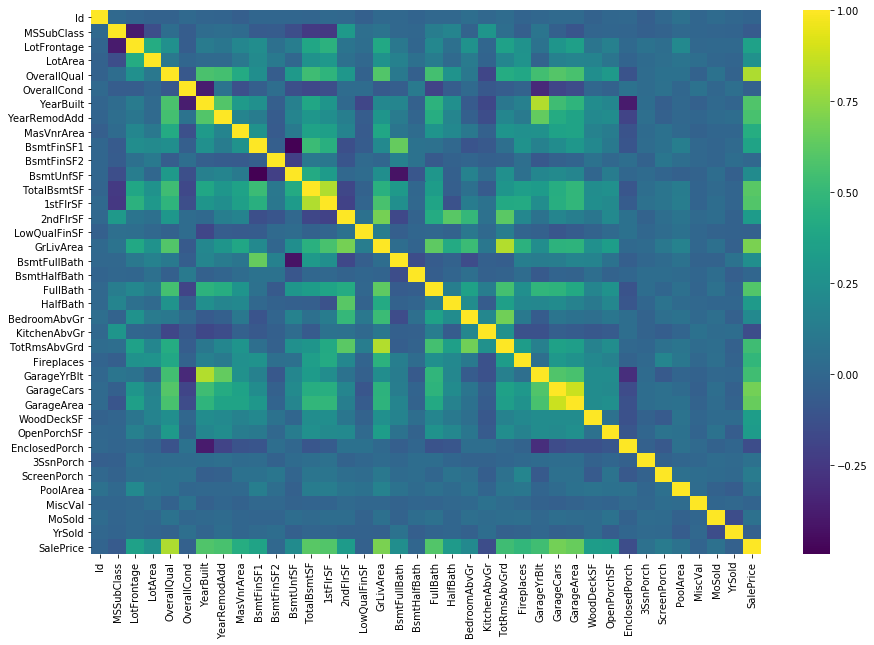

In [55]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(), cmap = "viridis")

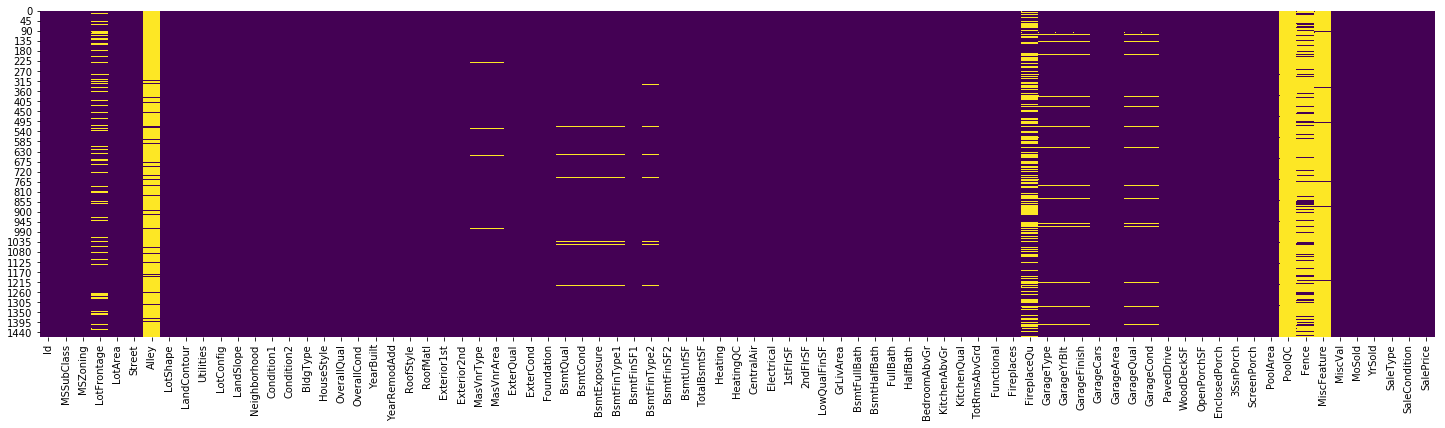

In [7]:
plt.figure(figsize = (25,6))
sns.heatmap(train.isnull(), cmap = "viridis", cbar = False)

In [267]:
train.fillna(train.median(), inplace=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [268]:
cat = train.select_dtypes(["object"])

In [269]:
zoning = pd.get_dummies(cat["MSZoning"], drop_first=True)

street = pd.get_dummies(cat["Street"], drop_first=True)

utilities = pd.get_dummies(cat["Utilities"], drop_first=True)

neigh = pd.get_dummies(cat["Neighborhood"])

kitchQ = pd.get_dummies(cat["KitchenQual"])

garage_type = pd.get_dummies(cat["GarageType"])

garage_finish = pd.get_dummies(cat["GarageFinish"])

lot_shape = pd.get_dummies(cat["LotShape"])
lot_shape = lot_shape.drop(["IR2","IR3"], axis=1)

land_contour = pd.get_dummies(cat["LandContour"])
land_contour = land_contour.drop(["HLS","Bnk","Low"], axis=1)

lot_config = pd.get_dummies(cat["LotConfig"])
lot_config = lot_config.drop(["FR2","FR3"], axis = 1)

land_slope = pd.get_dummies(cat["LandSlope"])
land_slope = land_slope.drop(["Mod","Sev"], axis = 1)

cond1 = pd.get_dummies(cat["Condition1"])
cond1 = cond1.drop(['Artery', 'Feedr','PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe','RRNn'], axis = 1)

cond2 = pd.get_dummies(cat["Condition2"])
cond2 = cond2.drop(['Artery', 'Feedr','PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'], axis = 1)

elect = pd.get_dummies(cat["Electrical"])
elect = elect.drop(["FuseA" ,"FuseF" ,"FuseP" ,"Mix"],axis = 1)

funct = pd.get_dummies(cat["Functional"])
funct = funct.drop(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev'],axis = 1)

garage_qual = pd.get_dummies(cat["GarageQual"])
garage_qual = garage_qual.drop(['Ex', 'Fa', 'Gd', 'Po'],axis = 1)

garage_cond = pd.get_dummies(cat["GarageCond"])
garage_cond = garage_cond.drop(['Ex', 'Fa', 'Gd', 'Po'],axis = 1)

paved = pd.get_dummies(cat["PavedDrive"])
paved = paved.drop(["N","P"],axis = 1)

sale_type = pd.get_dummies(cat["SaleType"])
sale_type = sale_type.drop(['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'Oth',"New"],axis = 1)

sale_cond = pd.get_dummies(cat["SaleCondition"])
sale_cond = sale_cond.drop(['Abnorml', 'AdjLand', 'Alloca', 'Family','Partial'],axis = 1)

dwelling_type = pd.get_dummies(cat["BldgType"])
dwelling_type = dwelling_type.drop(['2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],axis = 1)

house_style = pd.get_dummies(cat["HouseStyle"])
house_style = house_style.drop(['1.5Unf', '2.5Fin', '2.5Unf'],axis = 1)

roof_style = pd.get_dummies(cat["RoofStyle"])
roof_style = roof_style.drop(['Flat', 'Gambrel','Mansard', 'Shed'],axis = 1)

roof_mat = pd.get_dummies(cat["RoofMatl"])
roof_mat = roof_mat.drop(['ClyTile', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake','WdShngl'],axis = 1)

exst_1 = pd.get_dummies(cat["Exterior1st"])
exst_1 = exst_1.drop(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'ImStucc','Stone', 'Stucco'
                      ,'WdShing'],axis = 1)

mas_type = pd.get_dummies(cat["MasVnrType"])

ext_qual = pd.get_dummies(cat["ExterQual"])

ext_cond = pd.get_dummies(cat["ExterCond"])
ext_cond = ext_cond.drop(['Ex', 'Fa', 'Gd', 'Po'],axis = 1)

foundation = pd.get_dummies(cat["Foundation"])

bsmt_qual = pd.get_dummies(cat["BsmtQual"])

bsmt_cond = pd.get_dummies(cat["BsmtCond"])
bsmt_cond = bsmt_cond.drop(['Fa', 'Gd', 'Po'],axis = 1)

bsmt_expo = pd.get_dummies(cat["BsmtExposure"])

bsmt_type = pd.get_dummies(cat["BsmtFinType1"])

heating = pd.get_dummies(cat["Heating"])
heating = heating.drop(['Floor','GasW', 'Grav', 'OthW', 'Wall'],axis = 1)

heating_qc = pd.get_dummies(cat["HeatingQC"])
                       
central_air = pd.get_dummies(cat["CentralAir"], drop_first=True)

In [270]:
train.drop(["Id","MSZoning","Street","Utilities","Neighborhood","KitchenQual",
                   "GarageType","GarageFinish","LotShape","LandContour","LotConfig","LandSlope",
                   "Condition1","Condition2","Electrical","Functional","GarageQual","GarageCond",
                   "PavedDrive","SaleType","SaleCondition","BldgType","HouseStyle","RoofStyle",
                   "RoofMatl","Exterior1st","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual",
                   "BsmtCond","BsmtExposure","BsmtFinType1",'Exterior2nd','BsmtFinType2',
                   "Heating","HeatingQC","CentralAir","MasVnrArea","BsmtFinSF1","BsmtFinSF2",
                    "WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea",
                    "MiscVal","Alley","PoolQC","Fence","MiscFeature","FireplaceQu"], axis=1, inplace = True)

In [271]:
train = pd.concat([train,zoning,street,utilities,neigh,kitchQ,garage_type,garage_finish,lot_shape,land_contour,
                   lot_config,land_slope,cond1,cond2,elect,funct,garage_qual,garage_cond,paved,sale_type,
                   sale_cond,dwelling_type,house_style,roof_style,roof_mat,exst_1,mas_type,ext_qual,
                ext_cond,foundation,bsmt_qual,bsmt_cond,bsmt_expo,bsmt_type,heating,heating_qc,
                   central_air], axis = 1)

In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 138 entries, MSSubClass to Y
dtypes: float64(2), int64(25), uint8(111)
memory usage: 466.3 KB


# Test

In [282]:
test = pd.read_csv("/Users/Dario/Desktop/Kaggle/test.csv")

In [283]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


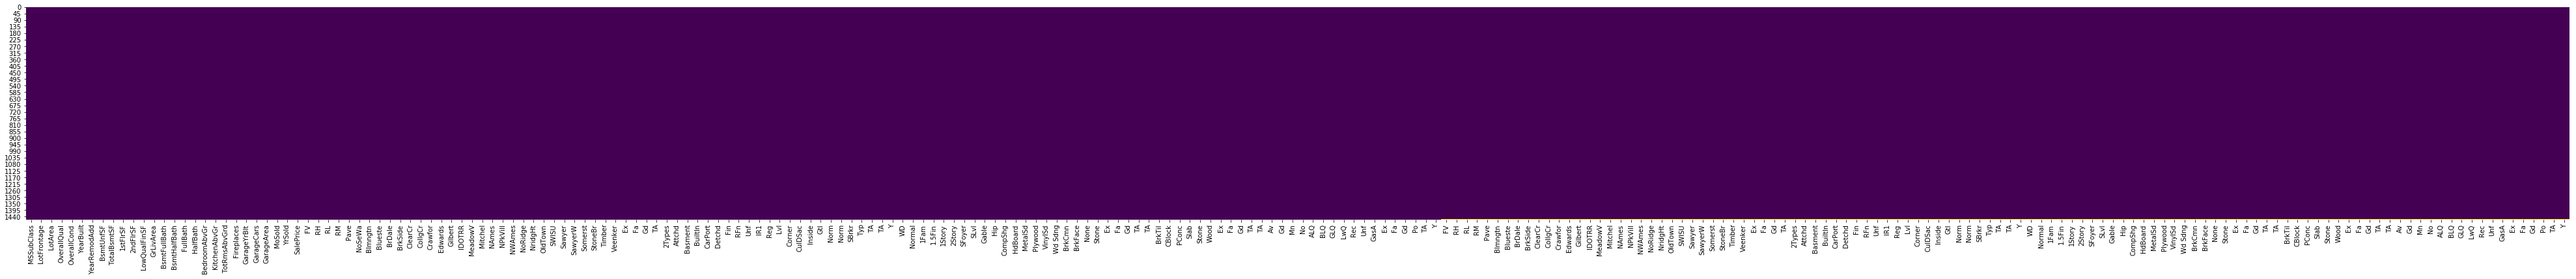

In [321]:
plt.figure(figsize = (70,6))
sns.heatmap(test.isnull(), cmap = "viridis", cbar = False)

In [285]:
test.fillna(test.median(), inplace=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,67.0,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [288]:
cat2 = test.select_dtypes(["object"])

In [312]:
zoning = pd.get_dummies(cat2["MSZoning"], drop_first=True)

street = pd.get_dummies(cat2["Street"], drop_first=True)

utilities = pd.get_dummies(cat2["Utilities"], drop_first=True)

neigh = pd.get_dummies(cat2["Neighborhood"])

kitchQ = pd.get_dummies(cat2["KitchenQual"])

garage_type = pd.get_dummies(cat2["GarageType"])

garage_finish = pd.get_dummies(cat2["GarageFinish"])

lot_shape = pd.get_dummies(cat2["LotShape"])
lot_shape = lot_shape.drop(["IR2","IR3"], axis=1)

land_contour = pd.get_dummies(cat2["LandContour"])
land_contour = land_contour.drop(["HLS","Bnk","Low"], axis=1)

lot_config = pd.get_dummies(cat2["LotConfig"])
lot_config = lot_config.drop(["FR2","FR3"], axis = 1)

land_slope = pd.get_dummies(cat2["LandSlope"])
land_slope = land_slope.drop(["Mod","Sev"], axis = 1)

cond1 = pd.get_dummies(cat2["Condition1"])
cond1 = cond1.drop(['Artery', 'Feedr','PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe','RRNn'], axis = 1)

cond2 = pd.get_dummies(cat2["Condition2"])
cond2 = cond2.drop(['Artery', 'Feedr','PosA', 'PosN'], axis = 1)

elect = pd.get_dummies(cat2["Electrical"])
elect = elect.drop(["FuseA" ,"FuseF" ,"FuseP"],axis = 1)

funct = pd.get_dummies(cat2["Functional"])
funct = funct.drop(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev'],axis = 1)

garage_qual = pd.get_dummies(cat2["GarageQual"])
garage_qual = garage_qual.drop(['Fa', 'Gd', 'Po'],axis = 1)

garage_cond = pd.get_dummies(cat2["GarageCond"])
garage_cond = garage_cond.drop(['Ex', 'Fa', 'Gd', 'Po'],axis = 1)

paved = pd.get_dummies(cat2["PavedDrive"])
paved = paved.drop(["N","P"],axis = 1)

sale_type = pd.get_dummies(cat2["SaleType"])
sale_type = sale_type.drop(['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'Oth',"New"],axis = 1)

sale_cond = pd.get_dummies(cat2["SaleCondition"])
sale_cond = sale_cond.drop(['Abnorml', 'AdjLand', 'Alloca', 'Family','Partial'],axis = 1)

dwelling_type = pd.get_dummies(cat2["BldgType"])
dwelling_type = dwelling_type.drop(['2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],axis = 1)

house_style = pd.get_dummies(cat2["HouseStyle"])
house_style = house_style.drop(['1.5Unf','2.5Unf'],axis = 1)

roof_style = pd.get_dummies(cat2["RoofStyle"])
roof_style = roof_style.drop(['Flat', 'Gambrel','Mansard', 'Shed'],axis = 1)

roof_mat = pd.get_dummies(cat2["RoofMatl"])
roof_mat = roof_mat.drop(["Tar&Grv","WdShake","WdShngl"],axis = 1)

exst_1 = pd.get_dummies(cat2["Exterior1st"])
exst_1 = exst_1.drop(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd','Stucco','WdShing'],axis = 1)

mas_type = pd.get_dummies(cat2["MasVnrType"])

ext_qual = pd.get_dummies(cat2["ExterQual"])

ext_cond = pd.get_dummies(cat2["ExterCond"])
ext_cond = ext_cond.drop(['Ex', 'Fa', 'Gd', 'Po'],axis = 1)

foundation = pd.get_dummies(cat2["Foundation"])

bsmt_qual = pd.get_dummies(cat2["BsmtQual"])

bsmt_cond = pd.get_dummies(cat2["BsmtCond"])
bsmt_cond = bsmt_cond.drop(['Fa', 'Gd', 'Po'],axis = 1)

bsmt_expo = pd.get_dummies(cat2["BsmtExposure"])

bsmt_type = pd.get_dummies(cat2["BsmtFinType1"])

heating = pd.get_dummies(cat2["Heating"])
heating = heating.drop(['GasW', 'Grav','Wall'],axis = 1)

heating_qc = pd.get_dummies(cat2["HeatingQC"])
                       
central_air = pd.get_dummies(cat2["CentralAir"], drop_first=True)

In [313]:
test.drop(["Id","MSZoning","Street","Utilities","Neighborhood","KitchenQual",
                   "GarageType","GarageFinish","LotShape","LandContour","LotConfig","LandSlope",
                   "Condition1","Condition2","Electrical","Functional","GarageQual","GarageCond",
                   "PavedDrive","SaleType","SaleCondition","BldgType","HouseStyle","RoofStyle",
                   "RoofMatl","Exterior1st","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual",
                   "BsmtCond","BsmtExposure","BsmtFinType1",'Exterior2nd','BsmtFinType2',
                   "Heating","HeatingQC","CentralAir","MasVnrArea","BsmtFinSF1","BsmtFinSF2",
                    "WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea",
                    "MiscVal","Alley","PoolQC","Fence","MiscFeature","FireplaceQu"], axis=1, inplace = True)

In [314]:
test = pd.concat([train,zoning,street,utilities,neigh,kitchQ,garage_type,garage_finish,lot_shape,land_contour,
                   lot_config,land_slope,cond1,cond2,elect,funct,garage_qual,garage_cond,paved,sale_type,
                   sale_cond,dwelling_type,house_style,roof_style,roof_mat,exst_1,mas_type,ext_qual,
                ext_cond,foundation,bsmt_qual,bsmt_cond,bsmt_expo,bsmt_type,heating,heating_qc,
                   central_air], axis = 1)

# LASSO

In [335]:
X = train.loc[:, train.columns != 'SalePrice']
y = train["SalePrice"]

In [275]:
from sklearn.linear_model import Lasso

In [336]:
lm = Lasso()

In [337]:
lm.fit(X,y)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
pred = lm.predict(test)

# Cross validation media ponderata

In [ ]:
from sklearn import metrics

In [ ]:
def frange(start, end, step):
    tmp = start
    while(tmp < end):
        yield tmp
        tmp += step  

In [ ]:
lista_valori=[]
for k1 in frange(0.1,1,0.1):
    for rep in range(1,10):
        
        ylog_train=np.log(y)

        X_train,X_test,y_train,y_test=train_test_split(X,ylog_train,test_size=0.2)

        clf_cross= Ridge(alpha=51.4528453099)
        clf_cross.fit(X_train,y_train)
        pred1=clf.predict(X_test)

        GBR = GradientBoostingRegressor(learning_rate = .05, n_estimators = 500).fit(X_train, y_train)
        pred2=GBR.predict(X_test)

        pred_final=(k1*pred1)+((1-k1)*pred2)
        lista_valori.append([k1,metrics.mean_squared_error(y_test,pred_final)])
        


In [ ]:
lista_x=[]
lista_y=[]
for i in range(len(lista_valori)):
    lista_x.append(lista_valori[i][0])
    lista_y.append(lista_valori[i][1])

In [ ]:
from numpy import median
med_lista=[]
for i in range(0,9):
    med_lista.append(np.mean(lista_y[(i*10+1):(i+1)*10]))

In [ ]:
med_lista

In [ ]:
plt.plot(range(0,9),med_lista,'ro')

In [ ]:
clf=Ridge(alpha=51.4528453099)
clf.fit(X, ylog_train)
clf.predict(test)
pred=pd.DataFrame({'SalePrice':clf.predict(test)},index=test.index)
pred.SalePrice=np.exp(pred.SalePrice)
pred.head(10)

In [ ]:
data = pd.DataFrame(columns= ["Id","SalePrice"])

In [ ]:
data["SalePrice"] = pred

In [ ]:
data["Id"] = test["Id"]

In [ ]:
data.to_csv("/Users/Dario/Desktop/result.csv", index=False)